# 2024-2025 Wind Farm Data Collection
Llano Estacado Wind, LLC (White Deer Wind Farm)
https://maps.app.goo.gl/Deam6SXaTDqie4MeA

Data provided via email by Dale Pilon, Asset Manager, Mitsubishi Heavy Industries America, Inc.

In [1]:
# Set up libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.dates as mdates
from pathlib import Path
import os
import numpy as np
from scipy.integrate import simpson

In [2]:
# Define the path to the input Excel file and the sheet name
dataset_1 = '2024-09-15_2024-09-21'
dataset_2 = '2024-09-22_2024-09-29'
dataset_3 = '2024-09-29_2024-10-05'
dataset_4 = '2024-10-06_2024-10-12'
dataset_5 = '2024-10-13_2024-10-19'
dataset_6 = '2024-10-20_2024-11-02'
dataset_7 = '2024-11-03_2024-11-09'
dataset_8 = '2024-11-10_2024-11-16'
dataset_9 = '2024-11-10_2024-12-01'
dataset_10 = '2024-12-02_2024-12-16'
dataset_11 = '2024-12-17_2025-01-05'
dataset_12 = '2025-01-06_2025-02-09'
dataset_13 = '2025-02-10_2025-04-06'

file_path_dataset_1 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_1}.xlsx")
file_path_dataset_2 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_2}.xlsx")
file_path_dataset_3 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_3}.xlsx")
file_path_dataset_4 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_4}.xlsx")
file_path_dataset_5 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_5}.xlsx")
file_path_dataset_6 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_6}.xlsx")
file_path_dataset_7 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_7}.xlsx")
file_path_dataset_8 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_8}.xlsx")
file_path_dataset_9 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_9}.xlsx")
file_path_dataset_10 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_10}.xlsx")
file_path_dataset_11 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_11}.xlsx")
file_path_dataset_12 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_12}.xlsx")
file_path_dataset_13 = Path(f"weekly_wdwf_data/EnergyDetails_{dataset_13}.xlsx")
sheet_name = "Data_Entity"

# Read the specified range from the Excel files
wind_data_dataset_1 = pd.read_excel(file_path_dataset_1, sheet_name=sheet_name, usecols="A:Q")
wind_data_dataset_2 = pd.read_excel(file_path_dataset_2, sheet_name=sheet_name, usecols="A:Q")
wind_data_dataset_3 = pd.read_excel(file_path_dataset_3, sheet_name=sheet_name, usecols="A:Q")
wind_data_dataset_4 = pd.read_excel(file_path_dataset_4, sheet_name=sheet_name, usecols="A:Q")
wind_data_dataset_5 = pd.read_excel(file_path_dataset_5, sheet_name=sheet_name, usecols="A:Q")
wind_data_dataset_6 = pd.read_excel(file_path_dataset_6, sheet_name=sheet_name, usecols="A:Q")
wind_data_dataset_7 = pd.read_excel(file_path_dataset_7, sheet_name=sheet_name, usecols="A:Q")
wind_data_dataset_8 = pd.read_excel(file_path_dataset_8, sheet_name=sheet_name, usecols="A:Q")
wind_data_dataset_9 = pd.read_excel(file_path_dataset_9, sheet_name=sheet_name, usecols="A:Q")
wind_data_dataset_10 = pd.read_excel(file_path_dataset_10, sheet_name=sheet_name, usecols="A:Q")
wind_data_dataset_11 = pd.read_excel(file_path_dataset_11, sheet_name=sheet_name, usecols="A:Q")
wind_data_dataset_12 = pd.read_excel(file_path_dataset_12, sheet_name=sheet_name, usecols="A:Q")
wind_data_dataset_13 = pd.read_excel(file_path_dataset_13, sheet_name=sheet_name, usecols="A:Q")

In [3]:
# Combine the data from the multiple weeks
wind_data = pd.concat([
    wind_data_dataset_1, wind_data_dataset_2, wind_data_dataset_3, wind_data_dataset_4, wind_data_dataset_5,
    wind_data_dataset_6, wind_data_dataset_7, wind_data_dataset_8, wind_data_dataset_9, wind_data_dataset_10,
    wind_data_dataset_11, wind_data_dataset_12, wind_data_dataset_13
])

In [4]:
# Ensure Date column is in datetime format (though it should already be)
wind_data.iloc[:, 1] = pd.to_datetime(wind_data.iloc[:, 1])

# Inspect and convert Time column to hh:mm:ss format if necessary
time_column = wind_data.iloc[:, 2]

# Replace '24:00' with '00:00' and add one day to the corresponding date
time_column = time_column.replace('24:00', '00:00')
wind_data.iloc[:, 1] = wind_data.iloc[:, 1] + pd.to_timedelta((time_column == '00:00').astype(int), unit='D')

In [5]:
# Convert the time column to hh:mm:ss format if necessary
if not time_column.str.match(r'^\d{2}:\d{2}:\d{2}$').all():
    # Assuming the time column is in a different format, e.g., hh:mm or hh:mm:ss.sss
    # Clean and convert to hh:mm:ss format
    def clean_time_string(time_str):
        # Extract the time part using regex
        match = re.search(r'\d{2}:\d{2}(:\d{2})?', time_str)
        if match:
            return match.group(0)
        return '00:00:00'  # Default value if no match found

    wind_data.iloc[:, 2] = time_column.apply(lambda x: pd.to_datetime(clean_time_string(x)).strftime('%H:%M:%S'))

# Convert Time column to timedelta and add to Date to form a complete Datetime
wind_data['Datetime'] = wind_data.iloc[:, 1] + pd.to_timedelta(wind_data.iloc[:, 2])

# Set Datetime as the index of the DataFrame
wind_data.set_index('Datetime', inplace=True)

# Sort the DataFrame by the Datetime index
wind_data.sort_index(inplace=True)

# Convert generation data in column index 6 to the opposite of its existing value
wind_data.iloc[:, 6] = wind_data.iloc[:, 6] * -1

# Rename columns to lowercase and replace spaces with underscores
wind_data.columns = wind_data.columns.str.lower().str.replace(' ', '_')


In [6]:
# Check for duplicate labels in the index
duplicates = wind_data.index[wind_data.index.duplicated()]
print("Duplicate labels in the index:", duplicates)

# Remove rows with duplicate index labels
wind_data = wind_data[~wind_data.index.duplicated()]

Duplicate labels in the index: DatetimeIndex(['2024-09-29 00:05:00', '2024-09-29 00:10:00',
               '2024-09-29 00:15:00', '2024-09-29 00:20:00',
               '2024-09-29 00:25:00', '2024-09-29 00:30:00',
               '2024-09-29 00:35:00', '2024-09-29 00:40:00',
               '2024-09-29 00:45:00', '2024-09-29 00:50:00',
               ...
               '2024-11-16 23:15:00', '2024-11-16 23:20:00',
               '2024-11-16 23:25:00', '2024-11-16 23:30:00',
               '2024-11-16 23:35:00', '2024-11-16 23:40:00',
               '2024-11-16 23:45:00', '2024-11-16 23:50:00',
               '2024-11-16 23:55:00', '2024-11-17 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=2316, freq=None)


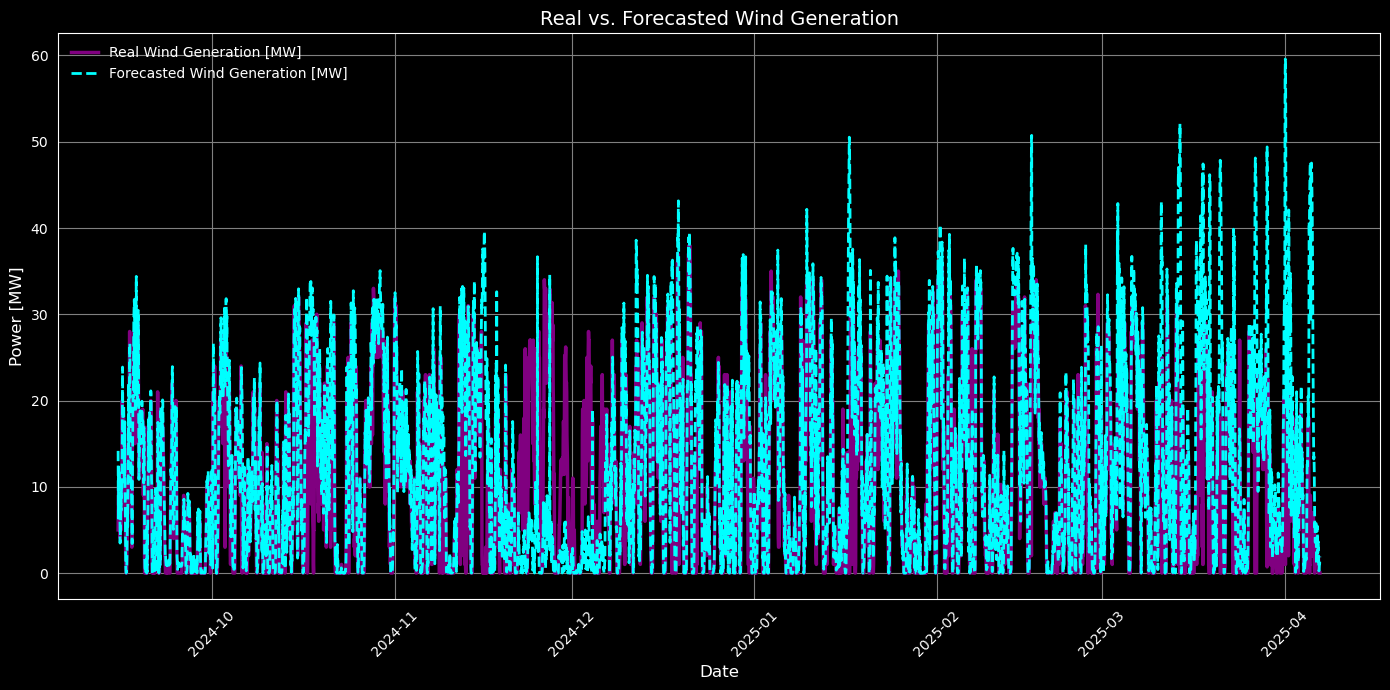

First day of the dataset: 2024-09-15 00:05:00
Last day of the dataset: 2025-04-07 00:00:00


In [7]:
# Plot the data using sns.lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(data=wind_data, x=wind_data.index, y='real-time_billing_meter_quantity_mwh', label='Real Wind Generation [MW]', linestyle='-', color='purple', linewidth=2.5)
sns.lineplot(data=wind_data, x=wind_data.index, y='hourly_wind_forecast_mwh', label='Forecasted Wind Generation [MW]', linestyle='--', color='cyan', linewidth=2)

# Formatting the plot
plt.xlabel('Date', fontsize=12, color='white')
plt.ylabel('Power [MW]', fontsize=12, color='white')
plt.title('Real vs. Forecasted Wind Generation', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

# Set the axes lines to white
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Set the legend font color to white and remove background fill
legend = plt.legend(fontsize=10, frameon=False)
for text in legend.get_texts():
    text.set_color('white')

# Set the background color of the plot and axes to black
plt.gcf().patch.set_facecolor('black')
ax.set_facecolor('black')

plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

# Print the first and last day of the dataset
first_day = wind_data.index.min()
last_day = wind_data.index.max()

print(f"First day of the dataset: {first_day}")
print(f"Last day of the dataset: {last_day}")

Output Combined .csv of Weekly Wind Data

In [8]:
# Output the concatenated data to a CSV file
output_csv_path = Path("weekly_wdwf_data/EnergyDetails_YTD.csv")
wind_data.to_csv(output_csv_path, index=False)

print(f"Concatenated wind data for all weeks has been saved to {output_csv_path}")

Concatenated wind data for all weeks has been saved to weekly_wdwf_data\EnergyDetails_YTD.csv


In [9]:
# Filter data for the specified date range
start_date = '2024-11-25'
end_date = '2024-12-01'
filtered_wind_data = wind_data.loc[start_date:end_date]

duplicates = filtered_wind_data.index[filtered_wind_data.index.duplicated()]
print(duplicates)

DatetimeIndex([], dtype='datetime64[ns]', name='Datetime', freq=None)


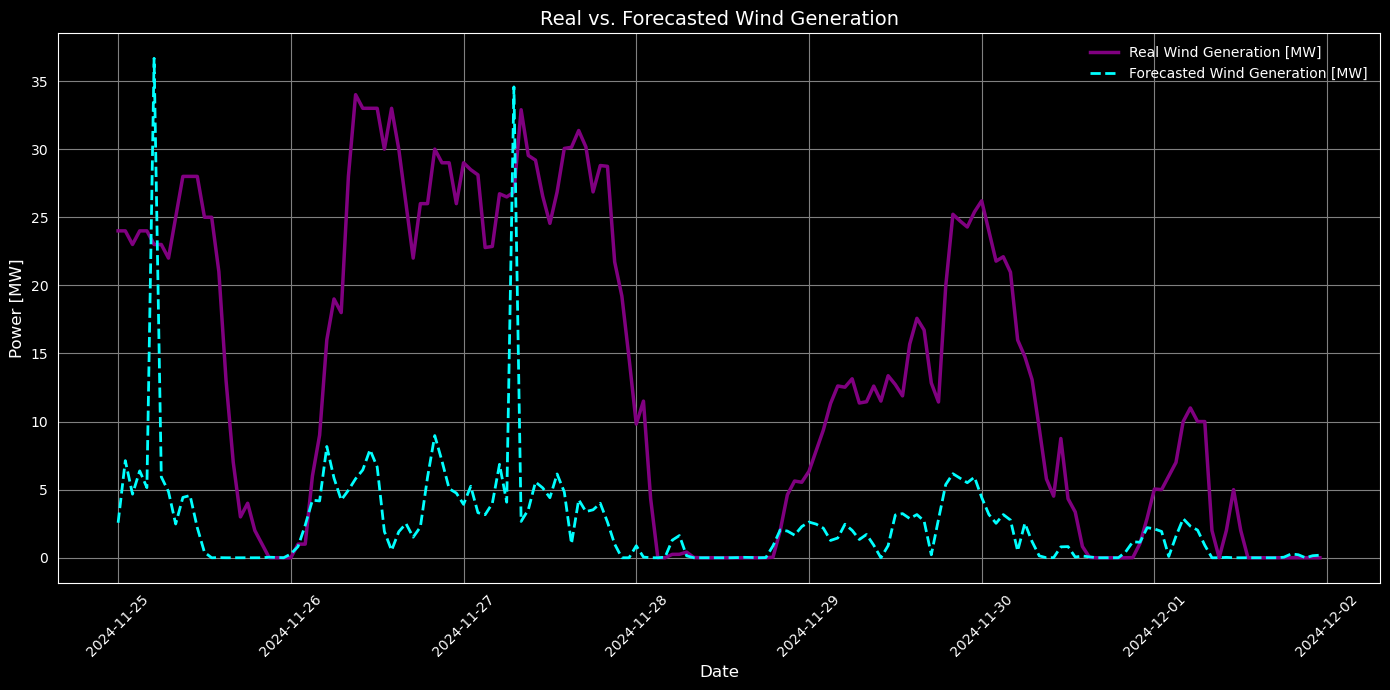

In [10]:
# Plot the data using sns.lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_wind_data, x=filtered_wind_data.index, y='real-time_billing_meter_quantity_mwh', label='Real Wind Generation [MW]', linestyle='-', color='purple', linewidth=2.5)
sns.lineplot(data=filtered_wind_data, x=filtered_wind_data.index, y='hourly_wind_forecast_mwh', label='Forecasted Wind Generation [MW]', linestyle='--', color='cyan', linewidth=2)

# Formatting the plot
plt.xlabel('Date', fontsize=12, color='white')
plt.ylabel('Power [MW]', fontsize=12, color='white')
plt.title('Real vs. Forecasted Wind Generation', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

# Set the axes lines to white
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Set the legend font color to white and remove background fill
legend = plt.legend(fontsize=10, frameon=False)
for text in legend.get_texts():
    text.set_color('white')

# Set the background color of the plot and axes to black
plt.gcf().patch.set_facecolor('black')
ax.set_facecolor('black')

plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

Check for Variance in Real vs. Forecasted Data

In [11]:
# Check only for filtered data

# Extract real-time and forecast values
real_time_mwh = filtered_wind_data['real-time_billing_meter_quantity_mwh'].dropna().values
forecast_mwh = filtered_wind_data['hourly_wind_forecast_mwh'].dropna().values

# Ensure both arrays have the same length after dropping NaNs
min_length = min(len(real_time_mwh), len(forecast_mwh))
real_time_mwh = real_time_mwh[:min_length]
forecast_mwh = forecast_mwh[:min_length]

# Initialize a list to store the area differences for each hour
hourly_area_differences = []

# Loop through each hour and calculate the area difference if the condition is met
for i in range(1, len(real_time_mwh)):
 
    # Calculate the area under the curve for the real time MWh data for the current hour
    area_real_time_hour = simpson(real_time_mwh[i-1:i+1], dx=1)
    #print(f"Hour {i}: Area under the curve for real-time MWh data = {area_real_time_hour:.2f} MWh")
        
    # Calculate the area under the curve for the forecast MWh data for the current hour
    area_forecast_hour = simpson(forecast_mwh[i-1:i+1], dx=1)
    #print(f"Hour {i}: Area under the curve for forecasted MWh data = {area_forecast_hour:.2f} MWh")
        
    # Calculate the difference in the areas for the current hour
    area_difference_hour = area_real_time_hour - area_forecast_hour
        
    # Append the area difference to the list
    hourly_area_differences.append((i, area_difference_hour))
    #print(f"Hour {i}: Area difference = {area_difference_hour:.2f} MWh")

# Calculate the total hourly area differences
total_area_difference = sum(diff for _, diff in hourly_area_differences if diff > 0)
print(f"The total difference between real-time and forecasted generated is {total_area_difference:.2f} MWh from {start_date} to {end_date}.")
if total_area_difference > 0:
    print("The total real-time generation is greater than the forecasted generation.")
else:
    print("The total real-time generation is less than the forecasted generation.")


The total difference between real-time and forecasted generated is 1814.30 MWh from 2024-11-25 to 2024-12-01.
The total real-time generation is greater than the forecasted generation.


In [12]:
# Check for all wind_data
# Define a function to calculate the total area difference for a given DataFrame
def calculate_total_area_difference(df):
    real_time_mwh = df['real-time_billing_meter_quantity_mwh'].dropna().values
    forecast_mwh = df['hourly_wind_forecast_mwh'].dropna().values

    # Ensure both arrays have the same length after dropping NaNs
    min_length = min(len(real_time_mwh), len(forecast_mwh))
    real_time_mwh = real_time_mwh[:min_length]
    forecast_mwh = forecast_mwh[:min_length]

    # Initialize a list to store the area differences for each hour
    hourly_area_differences = []

    # Loop through each hour and calculate the area difference if the condition is met
    for i in range(1, len(real_time_mwh)):
        # Calculate the area under the curve for the real time MWh data for the current hour
        area_real_time_hour = simpson(real_time_mwh[i-1:i+1], dx=1)
        # Calculate the area under the curve for the forecast MWh data for the current hour
        area_forecast_hour = simpson(forecast_mwh[i-1:i+1], dx=1)
        # Calculate the difference in the areas for the current hour
        area_difference_hour = area_real_time_hour - area_forecast_hour
        # Append the area difference to the list
        hourly_area_differences.append((i, area_difference_hour))

    # Calculate the total hourly area differences
    total_area_difference = sum(diff for _, diff in hourly_area_differences if diff > 0)
    return total_area_difference

# Group the data by week and calculate the total area difference for each week
wind_data['week'] = wind_data.index.to_period('W')
weekly_area_differences = wind_data.groupby('week').apply(lambda df: calculate_total_area_difference(df.reset_index(drop=True)))

# Print the weekly area differences
for week, diff in weekly_area_differences.items():
    print(f"Week {week}: Total difference = {diff:.2f} MWh")

Week 2024-09-09/2024-09-15: Total difference = 5.13 MWh
Week 2024-09-16/2024-09-22: Total difference = 61.05 MWh
Week 2024-09-23/2024-09-29: Total difference = 13.97 MWh
Week 2024-09-30/2024-10-06: Total difference = 14.17 MWh
Week 2024-10-07/2024-10-13: Total difference = 83.88 MWh
Week 2024-10-14/2024-10-20: Total difference = 80.87 MWh
Week 2024-10-21/2024-10-27: Total difference = 79.81 MWh
Week 2024-10-28/2024-11-03: Total difference = 75.46 MWh
Week 2024-11-04/2024-11-10: Total difference = 94.51 MWh
Week 2024-11-11/2024-11-17: Total difference = 72.99 MWh
Week 2024-11-18/2024-11-24: Total difference = 971.62 MWh
Week 2024-11-25/2024-12-01: Total difference = 1814.30 MWh
Week 2024-12-02/2024-12-08: Total difference = 997.56 MWh
Week 2024-12-09/2024-12-15: Total difference = 82.10 MWh
Week 2024-12-16/2024-12-22: Total difference = 77.07 MWh
Week 2024-12-23/2024-12-29: Total difference = 73.98 MWh
Week 2024-12-30/2025-01-05: Total difference = 70.29 MWh
Week 2025-01-06/2025-01-12: 

C:\Users\laura\AppData\Local\Temp\ipykernel_16560\3561639240.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_area_differences = wind_data.groupby('week').apply(lambda df: calculate_total_area_difference(df.reset_index(drop=True)))


In [13]:
# Print the total difference for all weeks
total_difference = weekly_area_differences.sum()
print(f"Total difference for all weeks = {total_difference:.2f} MWh")

Total difference for all weeks = 5445.55 MWh
